## 評估分類模型

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()

clf = LogisticRegression()
clf.fit(iris.data,iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 使用邏輯式回歸產生分類結果

In [2]:
predicted = clf.predict(iris.data)

In [4]:
sum(predicted == iris.target)/len(iris.target)

0.95999999999999996

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted,iris.target)

0.95999999999999996

In [9]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target,predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

## 使用svm 產生分類結果

In [11]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(iris.data,iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predicted2 = clf2.predict(iris.data)

In [13]:
m = confusion_matrix(iris.target,predicted2)
m

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

## 視覺化結果

Populating the interactive namespace from numpy and matplotlib


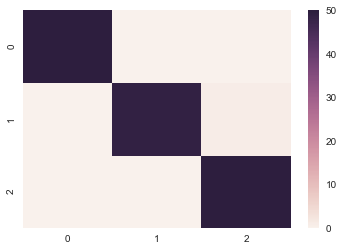

In [15]:
%pylab inline
import seaborn
seaborn.heatmap(m)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(predicted,iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.98      0.94        46
          2       0.98      0.91      0.94        54

avg / total       0.96      0.96      0.96       150



## 交叉驗證

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [23]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33,random_state=123)
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
predicted = clf.predict(test_X)

In [26]:
sum(predicted == test_y)/len(test_y)

0.95999999999999996

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predicted)

0.95999999999999996

In [29]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(predicted,test_y)
m

array([[20,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 17]])

In [32]:
from sklearn.model_selection import  KFold
kf = KFold(n_splits=10)

for train,test in kf.split(iris.data,iris.target):
    train_X, test_X, train_y, test_y = iris.data[train],iris.data[test],iris.target[train],iris.target[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted = clf.predict(test_X)
    #print(accuracy_score(predicted,test_y))
    m = confusion_matrix(predicted,test_y)
    print(m)

[[15]]
[[15]]
[[15]]
[[5 0 0]
 [0 9 0]
 [0 1 0]]
[[14  0]
 [ 1  0]]
[[12  0]
 [ 3  0]]
[[10  0]
 [ 0  5]]
[[ 0  2]
 [ 0 13]]
[[ 0  3]
 [ 0 12]]
[[15]]


In [33]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf,X=iris.data,y=iris.target,cv=10)
acc

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])

In [35]:
acc.mean()
acc.std()
acc.sum()

9.5333333333333332

## 留一驗證

In [39]:
from sklearn.model_selection import LeaveOneOut

res = []
loo = LeaveOneOut()
for tain,test in loo.split(iris.data,iris.target):
    train_X, test_X, train_y, test_y = iris.data[train],iris.data[test],iris.target[train],iris.target[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X,train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted==test_y).tolist())
res
sum(res)

150

## ROC curve

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf2.fit(iris.data,iris.target)
clf2.predict(iris.data)
clf2.predict_proba(iris.data)

array([[  8.79681649e-01,   1.20307538e-01,   1.08131372e-05],
       [  7.99706325e-01,   2.00263292e-01,   3.03825365e-05],
       [  8.53796795e-01,   1.46177302e-01,   2.59031285e-05],
       [  8.25383127e-01,   1.74558937e-01,   5.79356669e-05],
       [  8.97323628e-01,   1.02665167e-01,   1.12050036e-05],
       [  9.26986574e-01,   7.30004562e-02,   1.29693872e-05],
       [  8.95064974e-01,   1.04895775e-01,   3.92506205e-05],
       [  8.61839691e-01,   1.38141399e-01,   1.89095833e-05],
       [  8.03156719e-01,   1.96758495e-01,   8.47861140e-05],
       [  7.95421554e-01,   2.04552763e-01,   2.56832240e-05],
       [  8.92083069e-01,   1.07910759e-01,   6.17176870e-06],
       [  8.63364991e-01,   1.36600589e-01,   3.44201798e-05],
       [  7.88177618e-01,   2.11794929e-01,   2.74526810e-05],
       [  8.35079702e-01,   1.64888155e-01,   3.21426418e-05],
       [  9.28349898e-01,   7.16491356e-02,   9.66254924e-07],
       [  9.64535656e-01,   3.54620850e-02,   2.2587793

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris=load_iris()
X=iris.data[50:150,]
le=preprocessing.LabelEncoder()
y=le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33,random_state=123)
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [51]:
probas_=clf.fit(train_X,train_y).predict_proba(test_X)
probas_[:,1]

array([ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.])

In [55]:
probas_

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

## 客戶流失分析

In [61]:
import pandas

customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv',index_col=0)
customer.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [62]:
del customer['state']
del customer['account_length']
del customer['area_code']

In [63]:
customer.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 分群

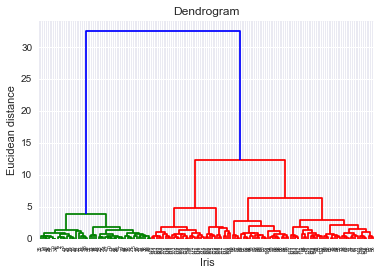

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(iris.data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Eucidean distance')
plt.show()

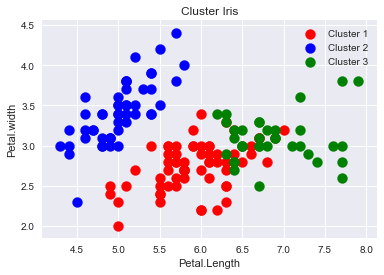

In [69]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

y_hc=hc.fit_predict(iris.data)
plt.scatter(iris.data[y_hc==0,0],iris.data[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(iris.data[y_hc==1,0],iris.data[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(iris.data[y_hc==2,0],iris.data[y_hc==2,1],s=100,c='green',label='Cluster 3')

plt.title('Cluster Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.width')
plt.legend()
plt.show()

## 降低維度

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris.data)


## 根據客戶屬性分群

In [73]:
import pandas


dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [74]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [82]:
X = dataset.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4])

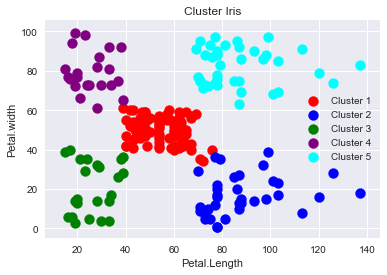

In [84]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='purple',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
plt.title('Cluster Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.width')
plt.legend()
plt.show()

## 比較不同分群法

In [85]:
# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [87]:
from sklearn import metrics
for est, title in zip([y_ward,y_complete, y_kmeans], ['ward', 'complete', 'kmeans']):
    print(title, metrics.silhouette_score(X, est))

ward 0.552994595515
complete 0.552994595515
kmeans 0.553931997445


## DBSCAN

In [89]:
import requests

res = requests.get('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png')